<center>
</center>


#  Простые симуляции

В этом задании мы решим несколько простых задачек на симуляции. 

In [16]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

## Упражнение 1 (распределение Пуассона)

Случайная величина $X$ имеет распределение Пуассона с $\lambda = 2$,  $X \sim Pois(2)$. С помощью $10^6$ симуляций оцените: 

* $P(X > 6)$
* $P(X > 6 \mid X > 5)$
* $P(X > 5, X < 7)$
* $E(X^3)$ 
* $E(X \mid X > 5)$

__Под чёрточками имеется в виду условная вероятность!!!__

Вбейте получившиеся ответы в переменные `ans1`, `ans2`, $\ldots$, `ans5`. 

In [4]:
poisson = sts.poisson.rvs(mu = 2, size = 10**6)
ans1 = sum(poisson > 6) / len(poisson)
ans2 = sum(poisson[poisson > 5] > 6) / sum(poisson > 5)
ans3 = sum((poisson > 5) & (poisson < 7)) / len(poisson)
ans4 = np.mean(poisson**3)
ans5 =  np.mean(poisson[poisson > 5])
print(ans1, ans2, ans3, ans4, ans5)

0.004458 0.26960991835500453 0.012077 21.9583 6.352766858179619


In [ ]:
# проверка, что задание решено корректно
assert np.abs(ans3 - 0.01) < 1e-2

## Упражнение 2 (нейросети)

Юра завёл себе две нейронные сетки и два сервера для их обучения. Две нейросети обучаются независимо на двух серверах. Время их обучения $T_1$ и $T_2$ равномерно распределено на отрезке $[1;3]$ (обучение измеряется в часах). В процессе обучения сервер может упасть. Момент падения сервера $T$ распределён экспоненциально с параметром $\lambda = 0.3$. Он не зависит от времени обучения нейросеток. 

Известно, что одна из нейросетей успела обучиться, а вторая не успела. Какова вероятность того, что $T \le 1.5$? Ответ вбейте в переменную `ans6`. При симуляциях для генерации момента падения используйте для обоих серверов одну и ту же случайную величину. 

**Hint:** при решении задачи помните о том, что у вас две нейросетки!

In [5]:
uniform = sts.uniform(1,3)
size = 10**6
T1 = uniform.rvs(size = size)
T2 = uniform.rvs(size = size)
T = sts.expon(scale = 1/0.3).rvs(size = size)

T1_fall=(T2 < T) & (T1 >= T) #второй упал
T2_fall=(T1 < T) & (T2 >= T) #первый упал
prob = ((T1_fall|T2_fall) & (T <= 1.5))
ans6 = prob.sum() / (T1_fall.sum() + T2_fall.sum())

In [6]:
# проверка, что задание решено корректно
assert ans6 < 0.2
assert ans6 > 0.1

## Упражнение 3 (квантильное преобразование)

Случайная величина $X$ описывается функцией распределения: 

$$
F(x) = \left( \frac{\ln x}{\ln \theta} \right)^{\alpha},  \quad x \in [1; \theta]
$$

Сгенерируйте из такого распределения выборку объёма $10^6$ и оцените математическое ожидание данной случайной величины. Запишите его в переменную `ans7`. В качестве параметров возьмите $\alpha=2, \theta = 10$.

In [33]:
theta = 10
alpha = 2

y = sts.uniform(0, theta).rvs(size= 10**6)
x = theta**(y**(1/alpha))
ans7 = np.mean(x)
print("ans7 =", ans7)

ans7 = 344.7831849812126


Нарисуйте для получившегося распределения гистограмму. Найдите в аналитическом виде плотность распределения. Нанесите её на картинку с гистограммой. 

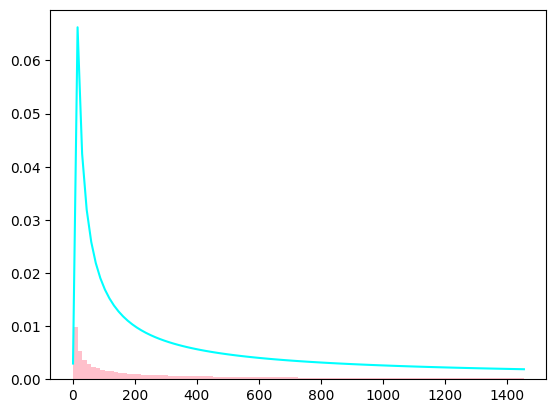

In [30]:
k = np.linspace(np.min(x), np.max(x), 100)
plt.hist(x, density = True, bins = 100, color = "pink");
plt.plot(k, alpha * (np.log(k) / np.log(theta)) ** alpha / (k * np.log(k)), color = 'cyan');

In [32]:
# проверка, что задание решено корректно
# assert ans7 < 6
# assert ans7 > 2

## Упражнение 4 (сходимость по вероятности)

__Это задание никак не оценивается.__ У распределения хи-квадрат есть следующее свойство: если $X_1, \ldots, X_n \sim iid~N(0,1)$, тогда имеет место следующая сходимость по вероятности:

$$
\frac{\chi^2_n}{n} = \frac{X_1^2 + \ldots + X_n^2}{n} \to  1
$$

Продемонстрируйте с помощью симуляций, что это именно так. От вас требуется построить ту же картинку, что мы строили при иллюстрации ЗБЧ в лекции. Не забудьте построить для нескольких разных $\varepsilon$ коридоры и убедиться, что последовательность с некоторого момента начинает пробивать их довольно редко.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you